# Predicting Customer Churn in the Telecommunication Industry 

## Problem Statement 
- The goal of this project is to develop a predictive model that accurately identifies customers who are likely to leave(churn) a telecommunication service provider. The model will help the company proactively address factors contributing to churn and implement retention strategies to minimize customer loss.   

## Background 
- No matter the nature, sector or domain of a business, every business's primary motive is to retain their customers both for profitability and growth. Therefore it is crucial to identify the customers who are likely to leave(churn) and take proper measures to retain the customers. A telecommunication company wants to identify and retain its customers from leaving their business. To achieve this, we leverage the company's historical customer data to develop a predictive model capable of identifying customers at a high risk of churning.

## Data Description
The dataset provided by the telecommunication company includes information about:

- Customers who left within the last month – the column is called Churn  
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies  
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges  
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Dataset - [Source](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) 

## Features info
1. customerID: Customer ID
2. gender: Whether the customer is a male or a female
3. Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No)
6. tenure: Number of months the customer has stayed with the company
7. Phone Service: Whether the customer has a phone service or not (Yes, No)
8. Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. Internet Service: Customer's internet service provider (DSL, Fiber optic, No)
10. Online Security: Whether the customer has online security or not (Yes, No, No internet service)
11. Online Backup: Whether the customer has online backup or not (Yes, No, No internet service)
12. Device Protection: Whether the customer has device protection or not (Yes, No, No internet service)
13. Tech Support: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. Streaming: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two year)
17. Paperless Billing: Whether the customer has papr not (Yes or No)
18. Payment Method: The customer's payment method (Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))
19. Monthly Charges: The amount charged to the   customer monthly
20. Total Charges: The total amount charged <br>   21. Churn: Whether the customer churned(left) or not (Yes, No), **This is the target variable**  not (Yes or No)


In [1]:
# import necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Overview of the data

In [2]:
df_original = pd.read_csv(r"F:\Data Science\Customer-Churn-Project\data\data_cleaned.csv")
df = df_original.copy()

In [3]:
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# <font color=#F49D08 > 1. Basic Analysis </font>
## Quick Overview of the data 
## Size of the dataset

In [4]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  7032
Number of Columns:  21


## Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Duplicate values

In [6]:
df.duplicated().sum()

0

#### <font color=#0DA2E7 >Observation:</font>
- As we have cleaned the data there are no missing values or duplicate values and the dtypes of columns are correct.

## Columns as per dtypes 

In [7]:
from termcolor import colored

cat_cols = []
num_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)


print(colored("Categorical Columns: ", "magenta"))
for col in cat_cols:
    print(col)

print(colored("\nNumerical Columns: ", "magenta"))
for col in num_cols:
    print(col)

Categorical Columns: 
customerID
gender
SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn

Numerical Columns: 
tenure
MonthlyCharges
TotalCharges


#### <font color=#0DA2E7 >Observation:</font>
- Out of 21 columns, 18 columns are categorical and rest 3 columns are numercal.

## Summary statistics of numerical columns

In [10]:
df_desc = (df.describe()
                        .drop("count", axis=0)
                        .style.background_gradient(axis=0, cmap="Blues")
                        .set_properties(**{"text-align": "center"})
                        .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
                        .set_caption("Summary Statistics") )

df_desc

#### <font color=#0DA2E7 >Observation:</font>

- We can see the maximum, minimum and average values of the numerical columns.
- The lowest tenure is 1 month and the highest tenure is 72 months. 50% percent of the customers have a tenure of 29 months.
- The lowest monthly charges is \\$18 and the highest is \\$118.  
- The lowest total charges is again \\$18 and the highest is \\$8684  .


# <font color = #F49D08   > 2. Uni-variate Analysis </font>

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Analyzing 'gender'

In [12]:
gender_counts = df['gender'].value_counts().reset_index()
gender_counts

gender  count
0    Male   3549
1  Female   3483

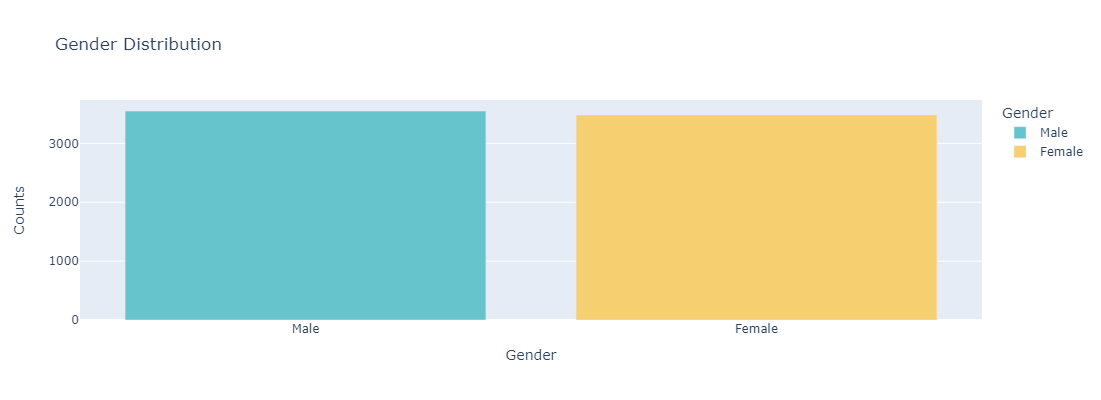

In [13]:
gender_counts.columns = ['Gender', 'Counts']

gender_vis = px.bar(gender_counts, 
                    x='Gender', y='Counts', 
                    title='Gender Distribution', 
                    width=600, height=400,
                    color='Gender',
                    color_discrete_sequence=px.colors.qualitative.Pastel)
gender_vis.show()

#### <font color=#0DA2E7 >Observation:</font>
- Both the values of male and female are almost balanced, our dataset is not biased towards a particular gender.

## Analyzing 'SeniorCitizen'

In [15]:
df.SeniorCitizen.value_counts()

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

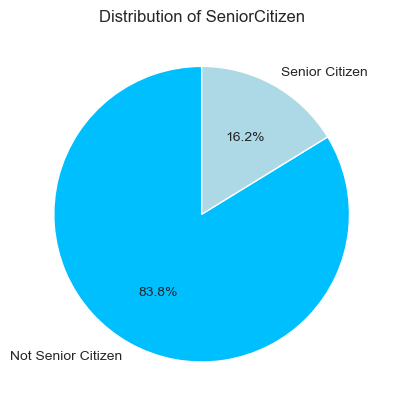

In [16]:
plt.pie(df['SeniorCitizen'].value_counts(), 
        labels=['Not Senior Citizen', 'Senior Citizen'],
        autopct='%1.1f%%', colors=['deepskyblue', 'lightblue'],#['#66b3ff','#99ff99']
        startangle=90)

plt.title('Distribution of SeniorCitizen')
plt.show()

#### <font color=#0DA2E7 >Observation:</font>
- Among the total customers 16% are senior citizen and the reset 84 percentage of customers are not senior citizen.
- Using the above information the telecommunication company could build a retention strategy for senior citizen customers and not senior citizen customers separately.

## Analyzing 'Partner'

In [17]:
df.Partner.value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Partner')

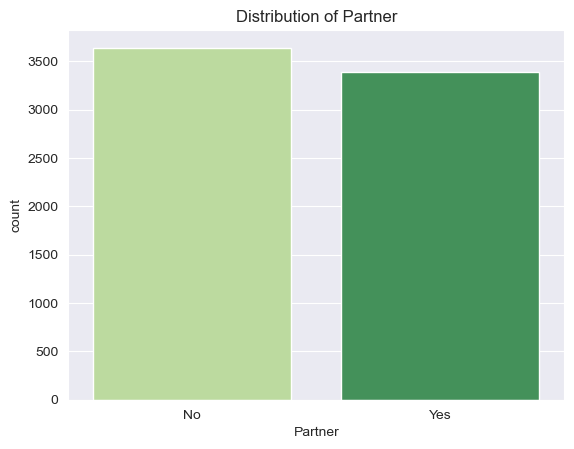

In [23]:
#colors = ['#ffffcc', '#ffff99']
colors = sns.color_palette("YlGn", n_colors=2)
sns.barplot(y=df['Partner'].value_counts(), x = df['Partner'].value_counts().index, palette=colors)
plt.title("Distribution of Partner")

#### <font color=#0DA2E7 >Observation:</font>
- Customers with partners and customers without partners are almost equal.
- And in our customer base, customers who are unmarried or not having partner are a little higher than the customers who are married or having a partner.

## Analyzing 'Dependents'

In [20]:
df.Dependents.value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

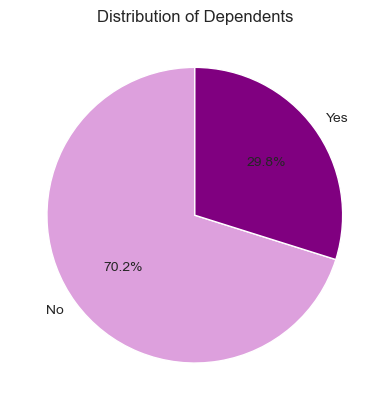

In [22]:
plt.pie(df.Dependents.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors = ['plum', 'purple'])
plt.title('Distribution of Dependents')
plt.show()

#### <font color=#0DA2E7>Observation:</font>
- From the above analysis it is clear that 70% of the customers do not have any dependents and the rest 30% of the customers do have dependents.

## Analyzing 'tenure'

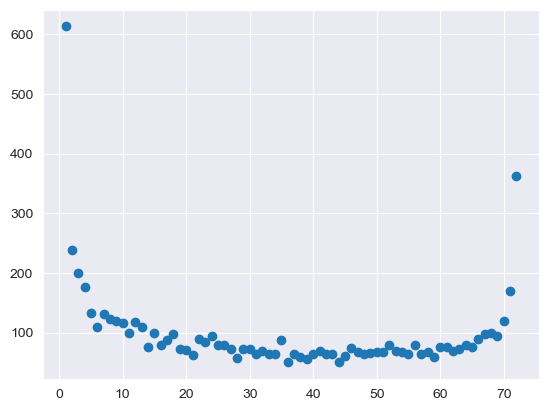

In [24]:
plt.scatter(df.tenure.value_counts().index, df.tenure.value_counts())

In [25]:
df.tenure.nunique()

72

#### <font color=#0DA2E7>Observation:</font>
- Totally there are 72 unique values in tenure column, we can create bin values like (1-12, 13-25 etc) to categories the values, by doing so our model will capture the information from tenure more effectively. 

### Grouping tenure in to categories of 12 months 

In [26]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df['tenure'] = pd.cut(df['tenure'], range(1, 80, 12), right=False, labels=labels)

In [27]:
df.tenure.value_counts()

tenure
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

## Analyzing 'Churn'

In [28]:
df.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn')

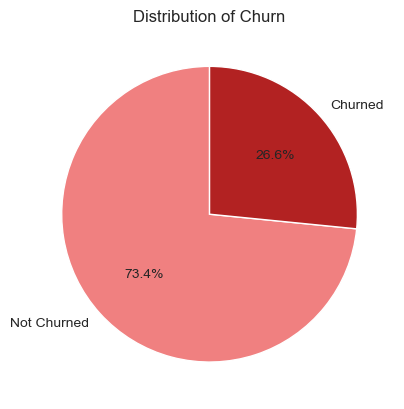

In [29]:
plt.pie(df.Churn.value_counts(), labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'firebrick'])
plt.title('Distribution of Churn')

#### <font color=#0DA2E7>Observation:</font>
- Around 26% of the total customers have left(churned) the company so far.
- And more importantly the data is <font color=lime>**Imbalance**</font> as the data is split in <font color=#F45108>**73:27 ratio**</font>. We have to handle the imbalance as it will biase the performance of our model.
- Logically we can assume that there are more chances for around 30-35% of customers are likely to leave the business again during the upcoming years. Lets dig deeper and find the reasons for churn in our analysis.

## Analyzing 'MonthlyCharges'

In [30]:
df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

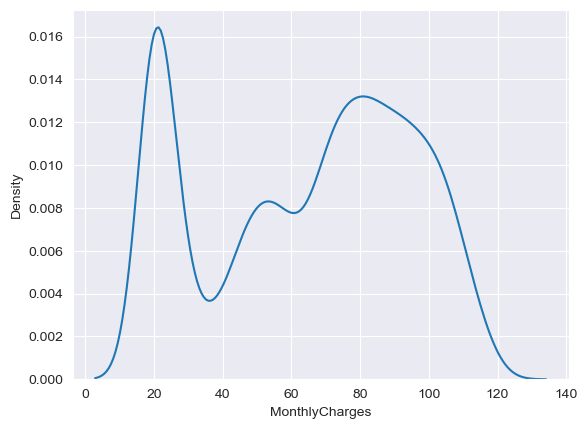

In [31]:
sns.kdeplot(df['MonthlyCharges'])

### <font color=#ODA2E7>Observation:</font>
- The amount charged monthly ranges between 18 to 118.
- The peak in the 20 indicates that a significant number of values ranges between 20-30s, which tells a significant group customers are charged a monthly amount which ranges between 20-30s.
- There is also another peak is around 80, suggesting another significant group of customers are being charged around this amount monthly.

## Analyzing 'TotalCharges'

In [32]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Axes: xlabel='TotalCharges', ylabel='Density'>

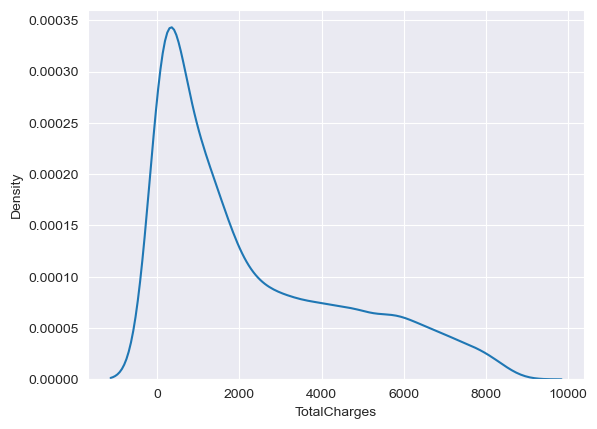

In [33]:
sns.kdeplot(df['TotalCharges'], )

### <font color=#ODA3E7>Observation:</font>
- The total charges range from approximately 0 to 8000.
- The distribution is right skewed meaning that most customers have lower total charges, with few customers having higher total customers.
- The average total charge is 2283, as the peak around 2000 indicates the average amount should be in the 2000s.

## Distributions of the categorical features 

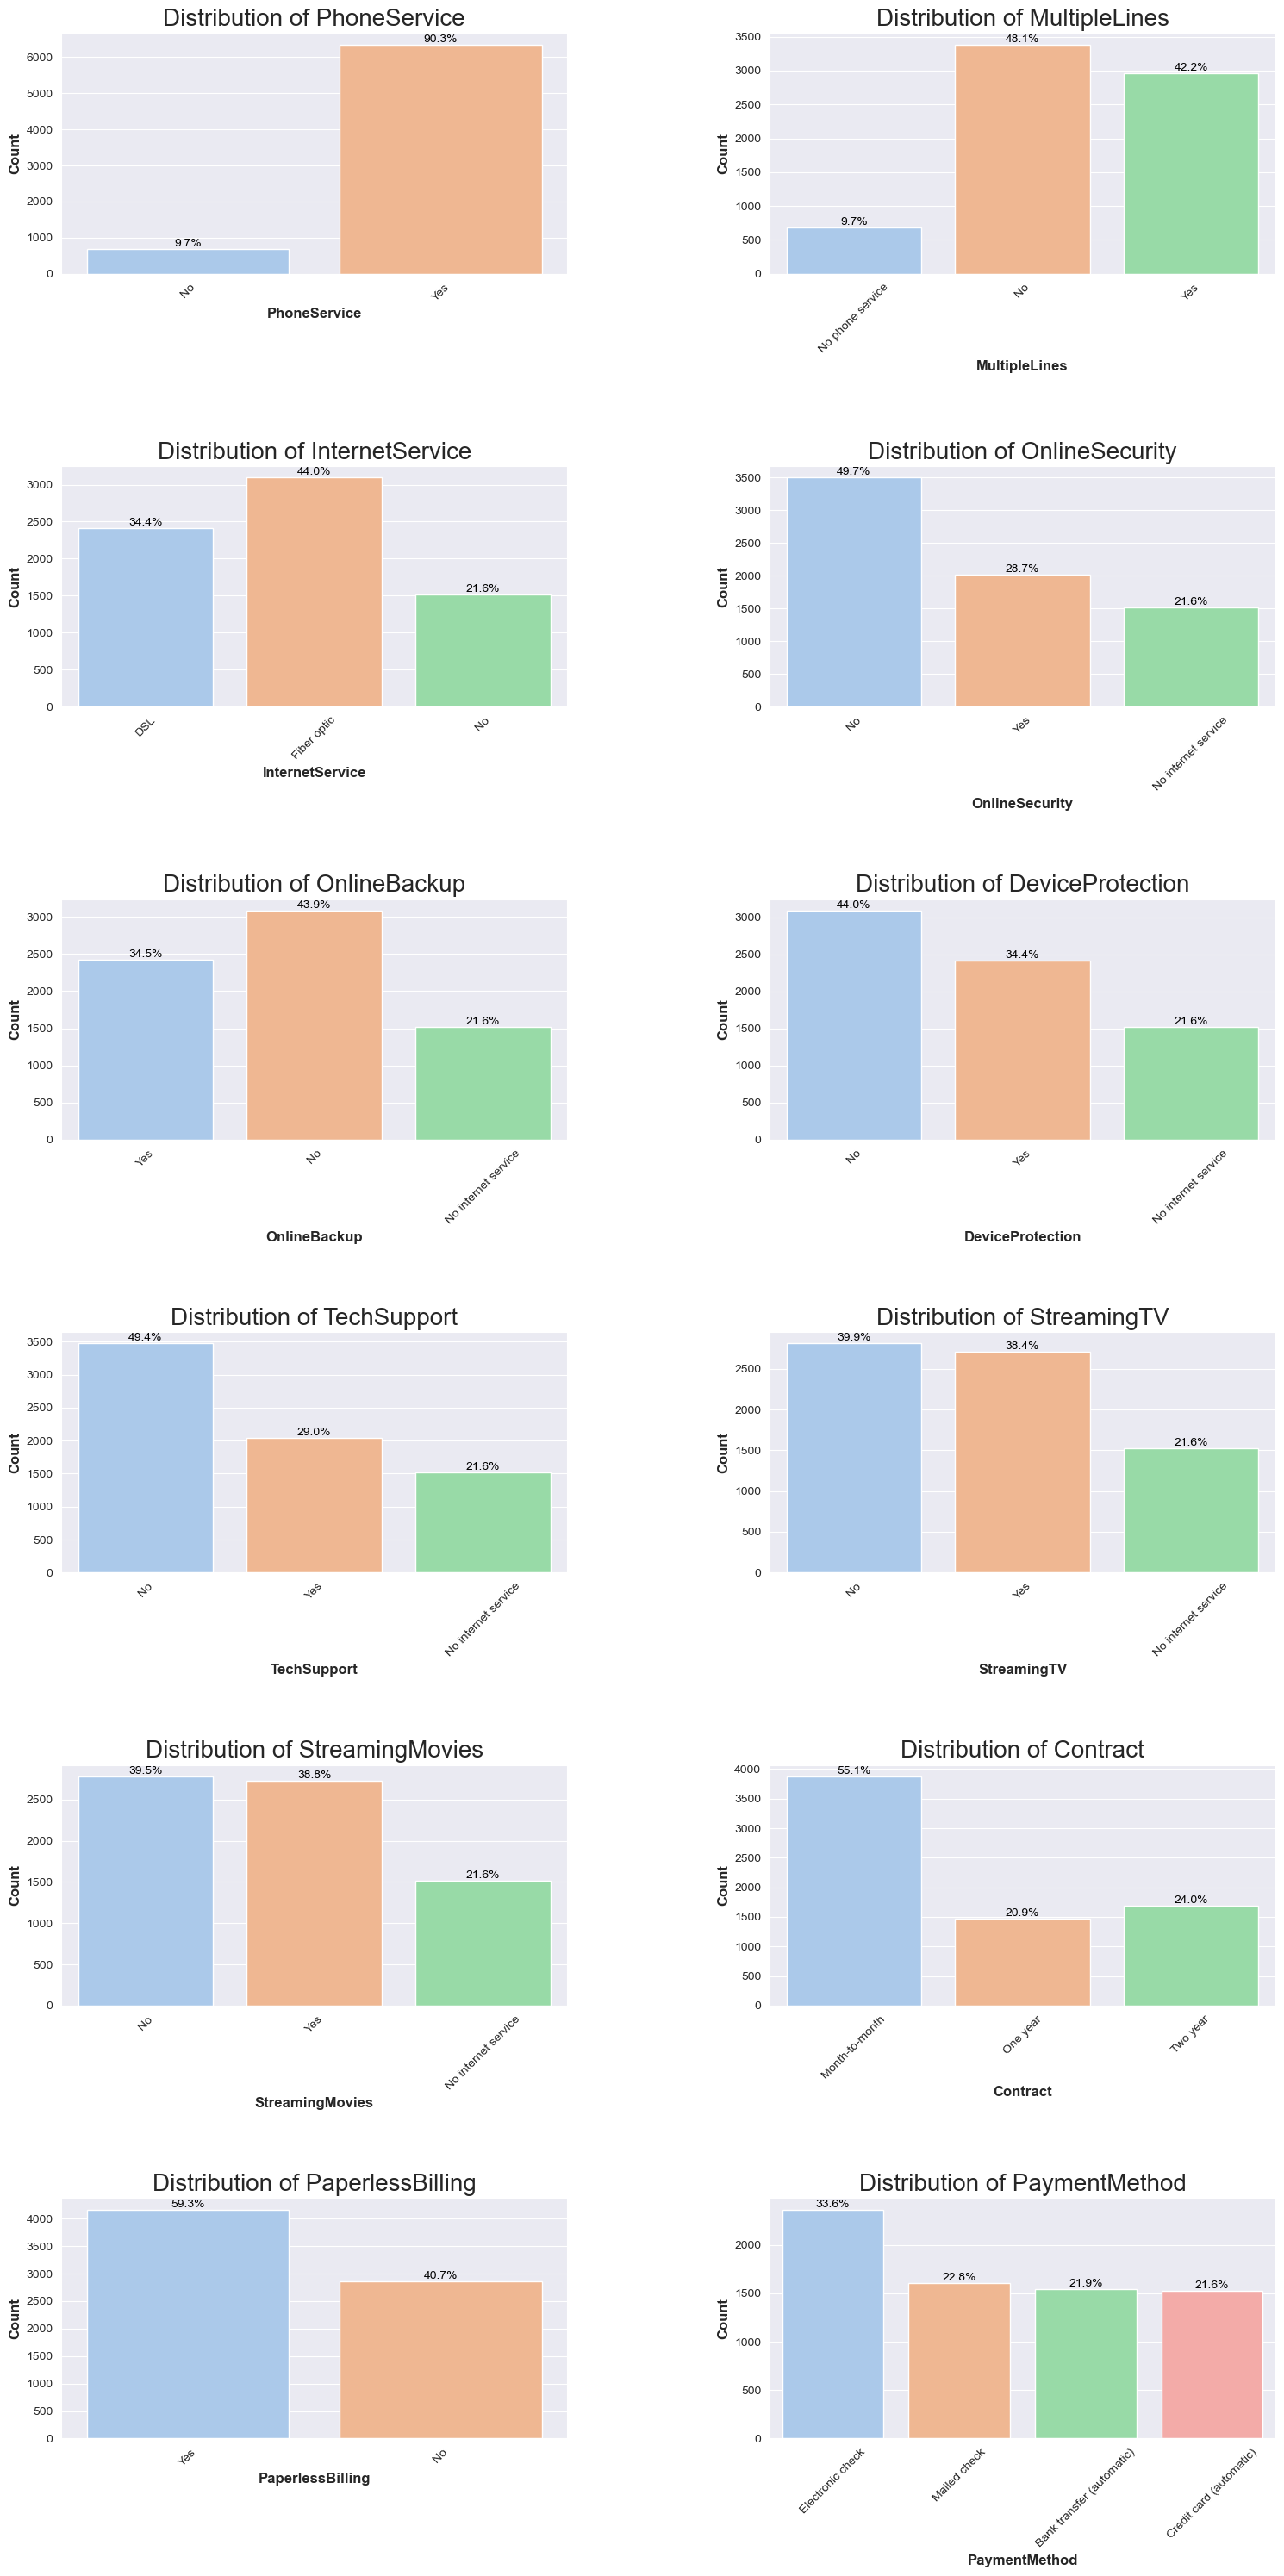

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Number of columns and rows for the subplot grid
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, feat in enumerate(features):
    sns.countplot(data=df, x=feat, palette='pastel', ax=axes[i])

    total = len(df[feat])

    # Adding percentages on the bars
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')
    
    axes[i].set_xlabel(feat, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[i].set_title("Distribution of " + feat, fontsize=20)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.8, wspace=0.4)
plt.show()


# <font color='#F49D08 '>3. Bi/Multivariate Analysis </font>

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 'tenure' and 'MonthlyCharges & TotalCharges'

In [36]:
pd.pivot_table(df, index='tenure', values=['MonthlyCharges', 'TotalCharges'])

MonthlyCharges  TotalCharges
tenure                               
1 - 12        56.172023    276.621563
13 - 24       61.357275   1126.257520
25 - 36       65.575481   1990.199279
37 - 48       66.318241   2827.473163
49 - 60       70.550781   3848.132572
61 - 72       75.952701   5180.669829

#### <font color=#0DA2E7>Observation:</font>
- As we can see the longer a customer stays with the company the higher the monthly and total amount charged to them.
- Therefore the company should focus on retaining its customers for longer period of time.

## 'Partner' and 'MonthlyCharges & TotalCharges'

In [37]:
pd.pivot_table(df, index='Partner', values=['MonthlyCharges', 'TotalCharges'])

MonthlyCharges  TotalCharges
Partner                              
No            61.956472   1584.960429
Yes           67.845977   3032.271648

#### <font color=#0DA2E7>Observation:</font>
- This is expected, customers with partners bring more revenue to the company than customers without partners.
- Customers and their partners tend to choose the same telecom service provider for their needs. As a result the company should provide separate personalized service packs to customers with partners and customers without partners. 

## 'Dependents' and 'MonthlyCharges & TotalCharges'

In [39]:
pd.pivot_table(df, index=['Dependents'], values=['MonthlyCharges', 'TotalCharges'])

MonthlyCharges  TotalCharges
Dependents                              
No               67.002808   2187.709254
Yes              59.617032   2507.955669

#### <font color=#0DA2E7>Observation:</font>
- There isn't a huge difference in the amount charged to Customers with dependents and customers without dependents.
- However a observation is that the monthly amount charged to customers without dependents is a little higher than customers with dependents. But this is not the case for the total amount charged.

## Distribution of numerical predictors by churn

In [40]:
pd.pivot_table(df, index='Churn', values=['MonthlyCharges', 'TotalCharges'])

MonthlyCharges  TotalCharges
Churn                              
No          61.307408   2555.344141
Yes         74.441332   1531.796094

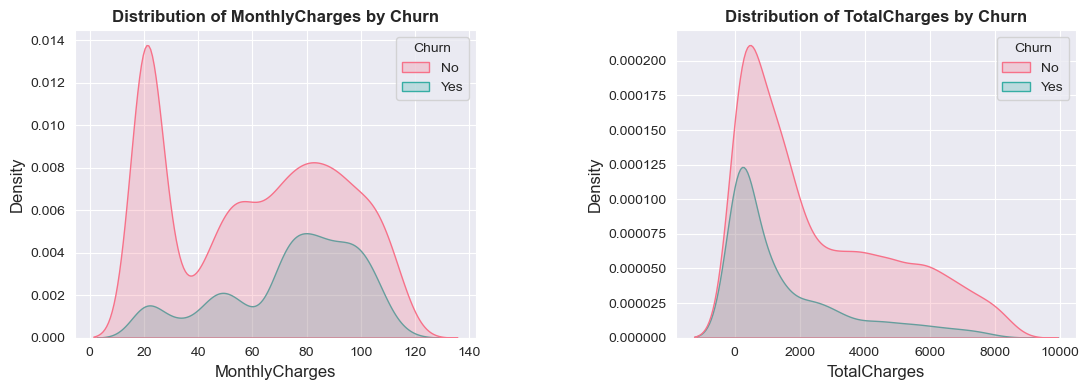

In [143]:
numerical_cols = ['MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, hue='Churn', ax=axes[i], shade=True, palette='husl')
    axes[i].set_title(f"Distribution of {col} by Churn", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

## <font color=#ODA2E7>Observation:</font>
- As expected, customers who are more likey to churn have lesser monthly and total charges. A totalcharge of 1531 is around 50% of totalcharges.
- The company should keep focus and give priority to those customers who have lesser total charge which would be around 50% or lesser, as they are more likely to churn.

## Distributions of categorical predictors by churn

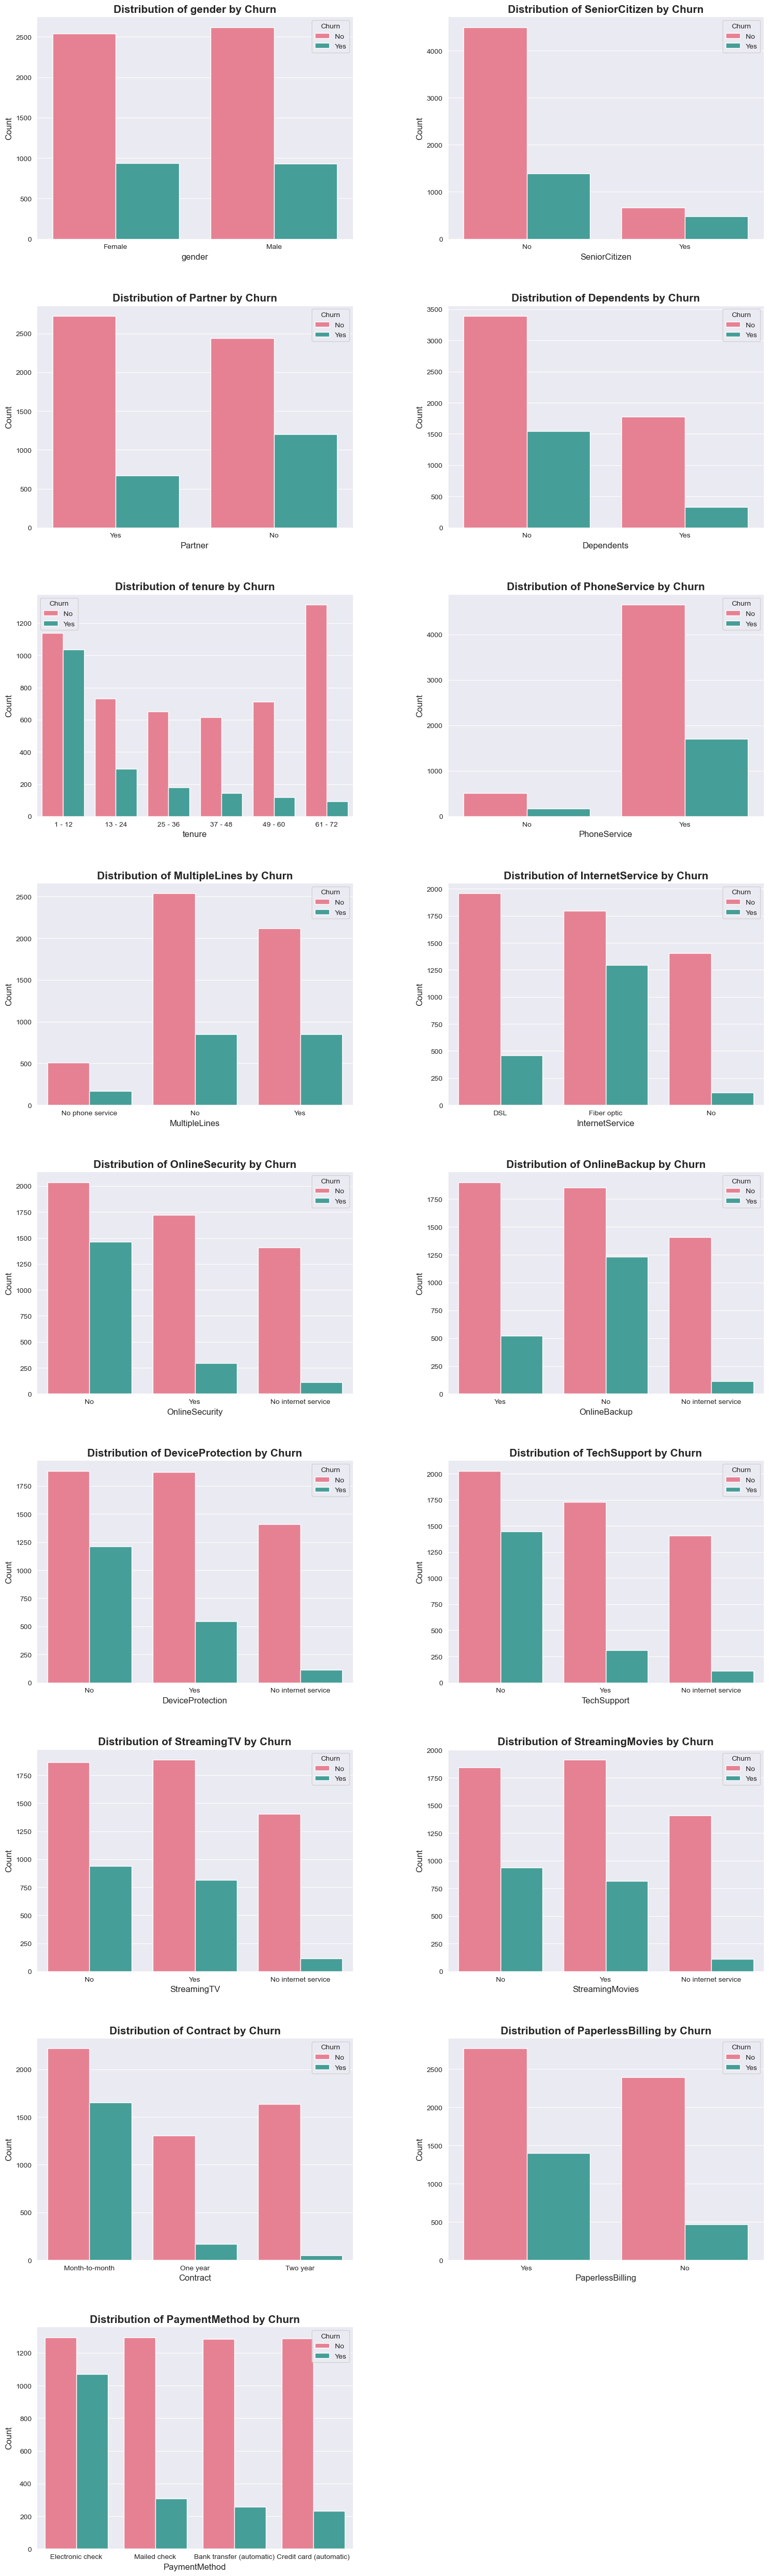

In [42]:
predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
              'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows= 9, ncols=2, figsize=(15, 50))
axes = axes.flatten()

for i, pred in enumerate(predictors):
    sns.countplot(data=df, x=pred, hue='Churn', palette='husl', ax=axes[i])
    axes[i].set_title("Distribution of " + pred + " by Churn", fontsize=15, fontweight='bold')
    axes[i].set_xlabel(pred, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()
    

#### <font color=#0DA2E7>Observation:</font>
From the above distributions we can interpret the following:
1. Gender doesn't have any relationship with churning. Both male and female customers are churning from the business in approx equal proportion.
2. Customers who are senior citizen are more likely to churn. Out of the total senior citizen customers around 80% of them have churned so far.
3. This is an interesting observation customers who do not have partner are more likely to churn than customers with partners. May be married customers, customers with partners have different priorities, needs than unmarried customers, customers without partners.
4. This relationship is exactly opposite to the above one, customers with dependents are less likely to churn than customers without dependents. Looks like Dependents may directly or indirectly influence decision making process.
5. Customers who have a tenure period of '1 year' are having higher chances of churning. Customers with tenure period of more than 2 years are unlikely to churn. The higher the churn period the lesser the chances of churning.
6. Customers who have as well as who do not have multiple lines have approx equal chances of churning.
7. Customers with internet services as fiber optic have higher chances of churning and with DSL the chances of churning is lesser.
8. Customers with contract period of Month-to-Month are more likely to churn. The company should focus on retaining its customers for a longer period of time or the company should provide various features, offers, bonuses for customers with month-to-month contract.
9. Customers with paperless billing and with payment method of electronic check have higher chances of churning.  

In [152]:
# save the dataframe
df.to_csv('data_eda.csv', index=False)